1859  images to be resized.
1856  images to be resized.
1852  images to be resized.
100  images to be resized.
100  images to be resized.
100  images to be resized.
100  images to be resized.
100  images to be resized.
100  images to be resized.
x_train shape: (5567, 28, 28, 3)
y_train shape: (5567,)
Epoch 1/30
174/174 [==============================] - 8s 30ms/step - loss: 1.1045 - accuracy: 0.3487 - val_loss: 1.0984 - val_accuracy: 0.3433
Epoch 2/30
174/174 [==============================] - 1s 3ms/step - loss: 1.0945 - accuracy: 0.3719 - val_loss: 1.0990 - val_accuracy: 0.3633
Epoch 3/30
174/174 [==============================] - 1s 3ms/step - loss: 1.0770 - accuracy: 0.4058 - val_loss: 1.0949 - val_accuracy: 0.3700
Epoch 4/30
174/174 [==============================] - 1s 3ms/step - loss: 1.0001 - accuracy: 0.5006 - val_loss: 1.1072 - val_accuracy: 0.3800
Epoch 5/30
174/174 [==============================] - 1s 3ms/step - loss: 0.8748 - accuracy: 0.5905 - val_loss: 1.0381 - val_accu

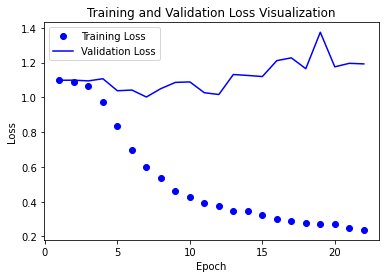

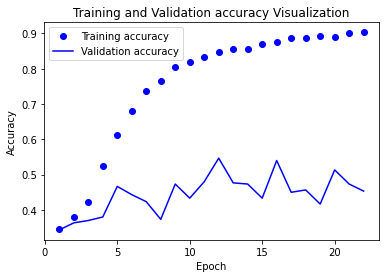

10/10 - 0s - loss: 1.9590 - accuracy: 0.5367
test_loss: 1.9589682817459106 
test_accuracy: 0.5366666913032532


In [3]:
from PIL import Image
import os, glob
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

from keras.layers import BatchNormalization
from keras.layers import Dropout
#print("PIL 라이브러리 import 완료!")

def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    #print(len(images), " images resized.")
    
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
def load_data(img_path, number_of_data=5567):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2 5567
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    #print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels



image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/validation/scissor"
resize_images(image_dir_path)
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/validation/rock"
resize_images(image_dir_path)
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/validation/paper"
resize_images(image_dir_path)


image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))


n_channel_1=16
n_channel_2=32
n_dense=16
n_train_epoch=30

model=keras.models.Sequential()
model.add(Dropout(0.1))
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
#model.add(BatchNormalization())

model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(Dropout(0.1))
model.add(keras.layers.Flatten())
#model.add(BatchNormalization())

model.add(Dropout(0.1))
model.add(Dropout(0.1))
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(Dropout(0.1))
model.add(keras.layers.Dense(3, activation='softmax'))

early_stop = keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0, patience=10, verbose=1)


#model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])


image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/validation"
(x_val, y_val)=load_data(image_dir_path,300)
x_val_norm = x_val/255.0



x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

history=model.fit(x_train_norm, y_train,validation_data=(x_val_norm,y_val) ,epochs=n_train_epoch, callbacks=[early_stop],batch_size=32)

#history=model.fit(x_train_norm, y_train,epochs=n_train_epoch)


history_dict = history.history

print(history_dict.keys())

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epoch = range(1,len(loss)+1)

plt.plot(epoch,loss,'bo',label='Training Loss')
plt.plot(epoch,val_loss,'b',label='Validation Loss')
plt.title('Training and Validation Loss Visualization')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf() # 그래프를 초기화
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

epoch = range(1,len(loss)+1)

plt.plot(epoch,accuracy,'bo',label='Training accuracy')
plt.plot(epoch,val_accuracy,'b',label='Validation accuracy')
plt.title('Training and Validation accuracy Visualization')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path,300)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))


가위바위보 게임 고찰
=============

1.첫 훈련 및 테스트
-------------

#### -Train 데이터: 제 노트북환경에서 웹캠으로 찍은 데이터 가위:100, 바위:100, 보:100  
#### -Test 데이터:정해선 퍼실님 웹캠으로 찍은 데이터 가위:100, 바위:100, 보:100
#### -Validation 데이터:정다훈님 웹캠으로 찍은 데이터 가위:99, 바위:100, 보:100
#### -하이퍼파라미터:n_channel_1=16,n_channel_1=32,n_dense=16, n_train_epoch=30
#### -결과: test_accuracy: 0.37(37프로), loss:3.65
#### -결과 고찰
* 처음으로 데이터를 훈련시켜 test를 해본결과 테스트 정확도가 37프로가 나왔습니다. 결과가 생각보다 나쁘게 나와서 왜그런지 생각을 해봤습니다. 제가 만든 훈련데이터는 저의 노트북 환경에서 약간 멀리서 사진을 찍었고 각도의 변화는 조금씩주면서 찍었습니다.테스트 데이터로는 다른 학생분이 찍은 사진을 사용 했습니다. 그 사진들을 관찰해보니 저보다 사진 찍는 거리가 가까웠고 다양한 각도에서의 가위,바위,보 사진을 찍었던 것이었습니다. 그래서 저는 제가 찍은 환경과 동일하게 다시 사진을 찍어 테스트를 해본결과 결과가 거의 80프로에 가까웠습니다.이러한 결과를 보면서 저의 모델이 저의 훈련데이터에 과적합되었다는 것을 알 수 있었습니다. 또한 제가 훈련시킨 모델을 평가하기 위해 validation도 진행했습니다. 다른 학생의 데이터로 validation을 진행했고 epoch를 30번 진행했습니다. 훈련데이터의 경우 epoch가 진행될수록 loss는 줄어들고 accuracy는 증가하는 이상적인 그래프를 그렸지만 validation데이터의 그래프를보면 loss는 더 늘어나고 accuracy는 증가하다 감소하는 형태를 보였습니다. 결과는 아래의 그림과 같습니다. 이러한 그래프는 과적합이 나타났다는 것을 보여주며 과적합을 줄이기 위해 하이퍼 파라미터를 변경하여 validation accuaracy의 정확도를 올리는 것이 필요하다고 생각했습니다.

 
<img src="2.PNG">
<br><br> 



#### -문제해결법(과적합줄이는 방법)
* 과적합을 올리기위해 과적합을 줄이는 방법을 몇가지 인터넷에서 찾아보았습니다. 많은 방법이 있지만 다음 2가지가 많이 쓰인다고합니다. 여러가지 방법이 있지만 제가 이해하고 적용한 방법들과 적용한 순서대로 작성하겠습니다.<br><br> 
    #### (1) 데이터의 양 늘리기<br><br>     
    #### (2) 학습규제전략(Regulation Strategies) 
     ###### (2-1) dropout 적용 
     ###### (2-2) early stop 적용
        
    

2.두번째 훈련 및 테스트(과적합 줄이기위한 방법1)
-------------
* 가장먼저 데이터의 양을 늘리는 것을 먼저했습니다. 웹캠으로 더 많이 찍어 데이터를 늘리기 보다는 같이 수업듣는 분들이 올려주신 데이터를 모두 합쳤습니다. 여기서 validation, test하기 위한 데이터는 제외하고 모두 통합하여 훈련데이터로 결정했습니다.
*
#### -Train 데이터: 학생들이 웹캠으로 찍은 데이터 가위:2270, 바위:2202, 보:2320  
#### -Test 데이터:제가 웹캠으로 찍은 데이터 가위:100, 바위:100, 보:100
#### -Validation 데이터:정다훈님 웹캠으로 찍은 데이터 가위:99, 바위:100, 보:100
#### -하이퍼파라미터:n_channel_1=16,n_channel_1=32,n_dense=16, n_train_epoch=30
#### -결과: test_accuracy: 0.62(62프로) loss: 3.49
#### -결과 고찰
* 결과는 아래와 같이 나왔습니다.
<img src="total-1.PNG">
<br><br>
<img src="total-2.PNG">
<br><br> 
<img src="total-3.PNG">
<br><br> 

* validation의 accuracy는 60프로를 못넘는것으로 보이나 test결과는 62프로가 나왔습니다. 그리고 loss함수의 결과도 좋지 않아 아직 과적합이 해소되지 않은 것으로 보여 과적합을 줄이는 다른 방법도 적용할 필요성을 느꼈습니다.

3.세번째 훈련 및 테스트(과적합 줄이기위한 방법2-1)
-------------
* Dropout이란 학습과정에서 신경망 일부를 사용하지 않는 방법입니다. 특정 조합에 너무 의존적이지 않게 해줘 과적합을 줄여준다고합니다. 기존 훈련과 동일하게 하되 코드에 keras에서 제공하는 dropout함수를 적용해보았습니다.

#### -Train 데이터: 학생들이 웹캠으로 찍은 데이터 가위:2270, 바위:2202, 보:2320  
#### -Test 데이터:제가 웹캠으로 찍은 데이터 가위:100, 바위:100, 보:100
#### -Validation 데이터:정다훈님 웹캠으로 찍은 데이터 가위:99, 바위:100, 보:100
#### -하이퍼파라미터:n_channel_1=16,n_channel_1=32,n_dense=16, n_train_epoch=30, 드랍률=0.1 드랍함수개수: 5개
#### -결과: test_accuracy: 0.623(62.3프로), loss:1.39
#### -결과 고찰
* 결과는 아래와 같이 나왔습니다.
<img src="val-1.PNG">
<br><br>
<img src="val-2.PNG">
<br><br> 
<img src="val-3.PNG">
<br><br> 

* validation의 accuracy는 이전결과와 비슷하게 60프로를 못넘는것으로 보이나 test결과는 62프로가 나왔습니다. 그런데 loss함수의 결과가 3.49에서 1.39로 이전 테스트보다 좋아짐을 볼 수 있었습니다. 더좋은 결과를 얻기위해 다른 방법도 적용해볼 필요를 느꼈습니다.

4.세번째 훈련 및 테스트(과적합 줄이기위한 방법2-2)
-------------
* 너무 많은 epoch를 할경우 과적합이 발생한다고합니다. 그래서 이를 방지하기위해 keras에서는 early stop기능을 제공해준다고합니다. early stop은 epoch를 돌려가면서 원하는 특성을 모니터링하고 이를 바탕으로 최고 유용성을 보이고 일정 epoch가 지난 이후 학습을 중단한다고합니다. 따라서 이 early stop을 적용해보았습니다. 

#### -Train 데이터: 학생들이 웹캠으로 찍은 데이터 가위:2270, 바위:2202, 보:2320  
#### -Test 데이터:제가 웹캠으로 찍은 데이터 가위:100, 바위:100, 보:100
#### -Validation 데이터:정다훈님 웹캠으로 찍은 데이터 가위:99, 바위:100, 보:100
#### -하이퍼파라미터:n_channel_1=16,n_channel_1=32,n_dense=16, n_train_epoch=30, 드랍률=0.1 드랍함수개수: 5개, early stop적용
#### -결과: test_accuracy: 0.616(61.6프로), loss:1.248
#### -결과 고찰
* 결과는 아래와 같이 나왔습니다.
<img src="early.PNG">


* validation의 accuracy는 이전결과와 비슷하게 60프로를 못넘는것으로 보이나 test결과는 61.6프로가 나왔습니다. 그런데 loss함수의 결과가 1.39에서 1.248로 이전 테스트보다 좋아짐을 볼 수 있었습니다. 시간부족으로인해 이정도로의 결과로 만족하기로 했습니다.

4.최종결론
-------------

* 가위 바위 보 각 100개의 데이터로 모델을 학습, 검증, 테스트를 해보니 결과가 안좋게 나왔었습니다. 퍼실님의 힌트와 풀잎스쿨에서 배운 내용을 바탕으로 이 결과는 과적합 때문에 발생한 것으로 판단 됐습니다. 따라서 과적합을 방지하기위한 방법을 구글링하여 적용시키려 했습니다. 대표적으로 훈련데이터량을 증가시키는 것과 학습을 Regulation하는 방법이 있었습니다. 데이터량은 다른 학생분들이 데이터를 올려줘서 양을 늘릴 수 있었습니다. 데이터량을 증가시켜 훈련시켜본 결과 accuracy는 요구도에 만족하게 나오긴 했었습니다. 그러나 loss가 높게나와 이를 줄일 필요가 있었습니다. 그래서 또다른 방법은 Regulation 방법들이 있고 이를 적용시키려고 했으나 방법이 매우 많았고 이해하기가 어려웠습니다. 그래서 제가 이해한 방법만 2가지를 적용하여 loss값을 줄여봤습니다. 제가 아쉬운점은 accuracy 요구도는 만족했으나 loss나 accuracy의 값을 더 좋게하고 싶어서 좀 더 데이터량을 늘리고 또다른 Regulation을 이해하여 적용시키려 했으나 시간이 부족하여 못했습니다. 이 프로젝트 이후에는 수업에서 이론을 좀더 보강하여 다양한 방법에 대해 이해아여 적용 시켜보고 싶습니다.